## Installing the necessary packages

In [7]:
!pip install diplib
!pip install numpy

## Make a path to your files
Make sure you have a folder on your computer named "IAAM_Images" and that you have the images saved inside that folder.
after ```home_dir``` you put the location of the folder in which you put your IAAM_Images. 

In [1]:
%matplotlib inline
import diplib as dip
import numpy as np
import os
import matplotlib.pyplot as plt
# Define the path to the home_dir folder on the C or D drive ()
home_dir = ".\\"  # Use double backslashes to escape the backslash

# Construct the full path to the folder "IAAM Images" within the home_dir folder
iaam_images_path = os.path.join(home_dir, "IAAM_Images")


print ( iaam_images_path)
# Check if the code can find the file (check the file)
if os.path.exists(home_dir):
    print("The path exists and can be found.")
else:
    print("The path does not exist or cannot be found.")


DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org
.\IAAM_Images
The path exists and can be found.


## Read the image

In [2]:
# Specify the file name (for other images put other filenames here.)
file_name = "rect2a.tif"
A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))

## Show the image 
A pop-up window will open

In [3]:
dip.viewer.Show(A)

In [11]:
def plot_histogram(file_name):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    hist= dip.Histogram(A)
    print(hist)
    hist.Show()



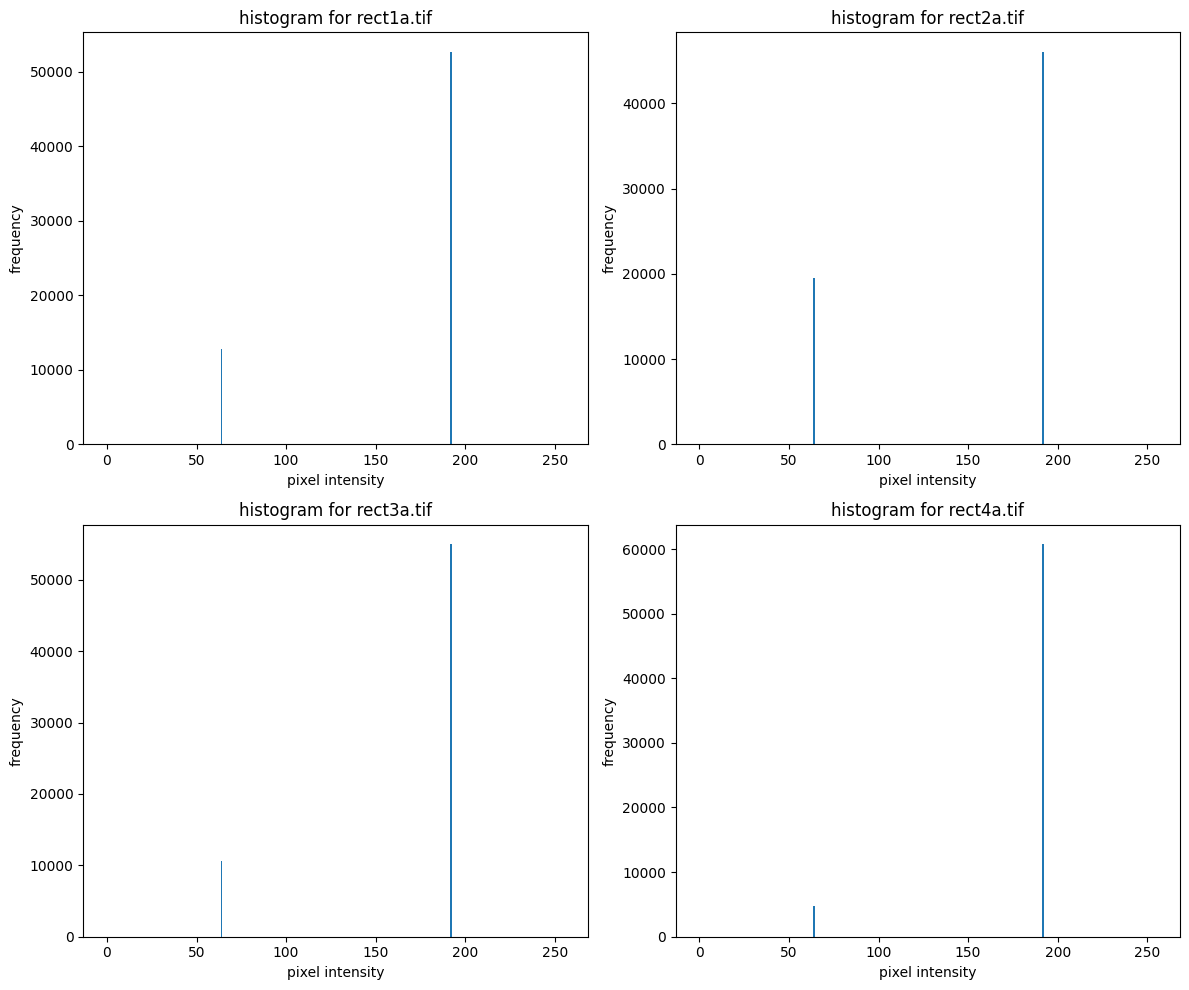

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs = axs.flatten()
file_names = ["rect1a.tif", "rect2a.tif", "rect3a.tif", "rect4a.tif"]


for idx, file_name in enumerate(file_names):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    
    hist = dip.Histogram(A)
    
    bin_counts = hist.GetImage()
    
    bin_centers = hist.BinCenters()
    
    axs[idx].bar(bin_centers, bin_counts, width=1.0, align='center')
    axs[idx].set_title(f"histogram for {file_name}")
    axs[idx].set_xlabel('pixel intensity')
    axs[idx].set_ylabel('frequency')
    axs[idx].grid(False)

fig.tight_layout()
plt.show()

In [13]:
def plot_histogram(file_name):
    # Read the image using diplib
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    
    # Compute the histogram using diplib
    hist = dip.Histogram(A)
    
    # Retrieve bin counts using the GetImage method
    bin_counts_img = hist.GetImage()
    bin_counts = bin_counts_img  # Flatten to a 1D array
    
    # Retrieve bin centers
    bin_centers = hist.BinCenters()
    
    # Plot using matplotlib
    plt.figure(figsize=(8, 5))
    plt.bar(bin_centers, bin_counts, width=1.0, align='center')
    plt.title(f"Histogram for {file_name}")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

rect1a.tif


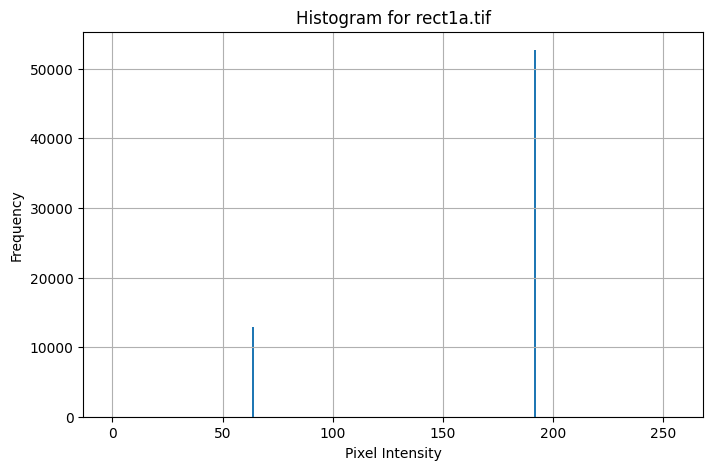

rect2a.tif


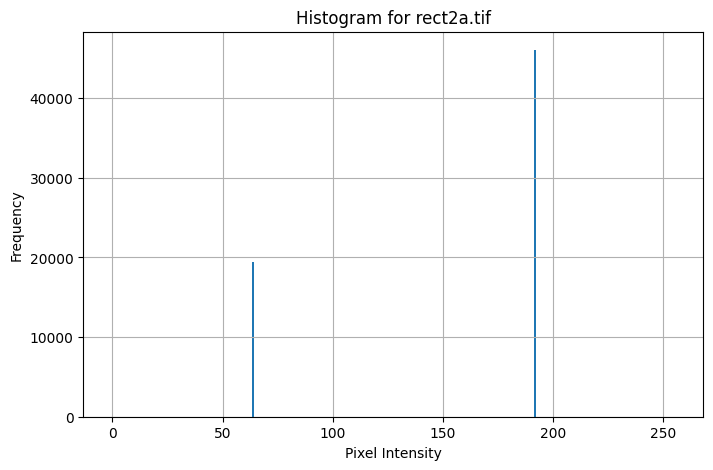

rect3a.tif


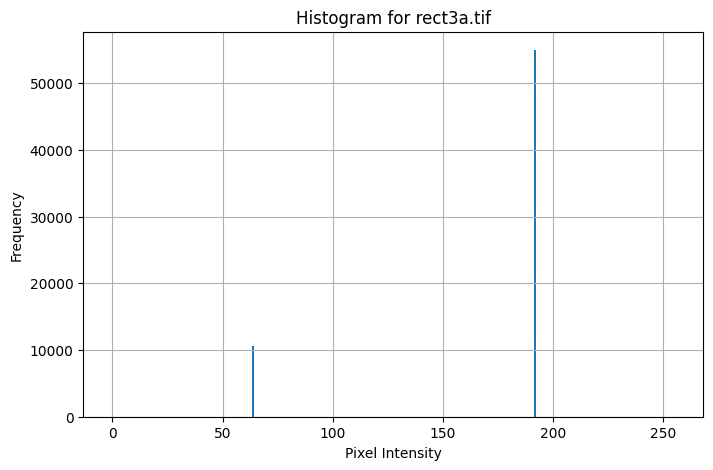

rect4a.tif


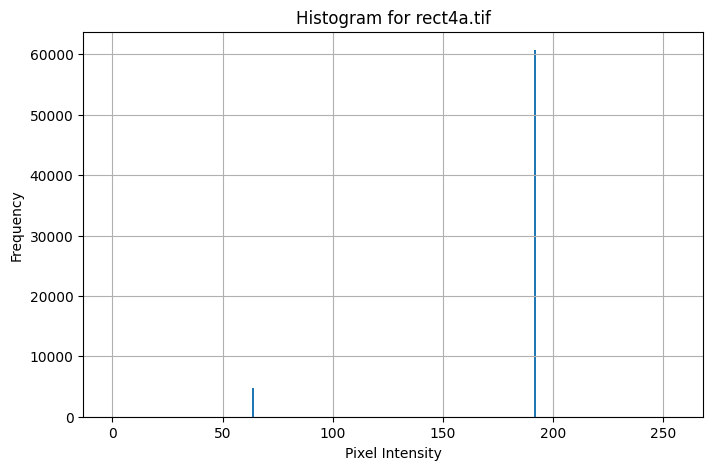

In [14]:
file_names = ["rect1a.tif", "rect2a.tif", "rect3a.tif", "rect4a.tif"]

for file_name in file_names:
    print(file_name)
    plot_histogram(file_name)
    

In [15]:
file_name = "rect2a.tif"
A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))

In [16]:
threshold = dip.IsodataThreshold(A)
binary_image = A < 70
print(threshold)

2D Scalar image:
    data type:      BIN
    sizes:          {256, 256}
    strides:        {1, 256}, tensor stride 1
    data pointer:   000002007C518ED0 (shared among 1 images)
    origin pointer: 000002007C518ED0



In [17]:
labeled_image = dip.Label(binary_image, connectivity=1)


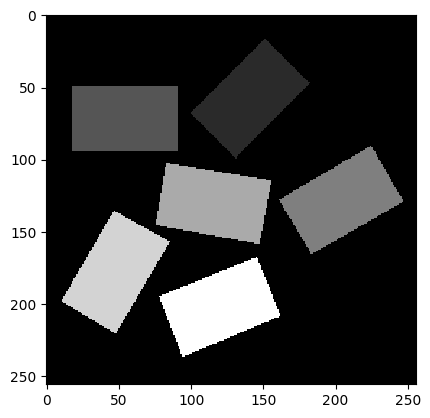

In [18]:
labeled_image.Show()
# dip.viewer.Show(labeled_image)

In [19]:
measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Size'])
sizes = np.array([measurements['Size'][obj] for obj in measurements.Objects()])
for i in sizes:
    print (i)

[3195.]
[3285.]
[3265.]
[3248.]
[3230.]
[3262.]


In [20]:
sizes

array([[3195.],
       [3285.],
       [3265.],
       [3248.],
       [3230.],
       [3262.]])

## 2.1.2

In [21]:
def compute_size(file_name):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    binary_image = A < 70
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Size'])
    sizes = np.array([measurements['Size'][obj] for obj in measurements.Objects()])
    return sizes
    

In [22]:
all_sizes = []

for file_name in file_names:
    sizes = compute_size(file_name)
    all_sizes.extend(sizes)
all_sizes_arr = np.array(all_sizes)

In [23]:
print(all_sizes_arr)
print(np.mean(all_sizes_arr))
print(np.std(all_sizes_arr))

[[12848.]
 [ 3195.]
 [ 3285.]
 [ 3265.]
 [ 3248.]
 [ 3230.]
 [ 3262.]
 [ 1320.]
 [ 1328.]
 [ 1335.]
 [ 1304.]
 [ 1340.]
 [ 1309.]
 [ 1297.]
 [ 1360.]
 [  475.]
 [  480.]
 [  480.]
 [  480.]
 [  486.]
 [  473.]
 [  468.]
 [  499.]
 [  484.]
 [  505.]]
1910.24
2477.835963577896


## 2.1.3

In [24]:
def compute_perimeter(file_name):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    binary_image = A < 70
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Perimeter'])
    sizes = np.array([measurements['Perimeter'][obj] for obj in measurements.Objects()])
    return sizes

In [25]:
all_perims = []

for file_name in file_names:
    sizes_p = compute_perimeter(file_name)
    all_perims.extend(sizes_p)
all_perims_arr = np.array(all_perims)

In [26]:
all_perims_arr

array([[457.49759265],
       [233.73359265],
       [230.13759265],
       [234.67559265],
       [235.97759265],
       [233.26959265],
       [235.06959265],
       [143.89759265],
       [148.76959265],
       [148.86159265],
       [146.93359265],
       [147.00959265],
       [147.54159265],
       [147.16159265],
       [150.47359265],
       [ 92.43359265],
       [ 90.97759265],
       [ 90.97759265],
       [ 92.92159265],
       [ 93.35359265],
       [ 92.04559265],
       [ 92.66959265],
       [ 93.54359265],
       [ 94.07559265],
       [ 95.22959265]])

In [27]:
print(np.mean(all_perims_arr))
print(np.std(all_perims_arr))


158.7695126535898
81.87284860900834


## 2.2.4

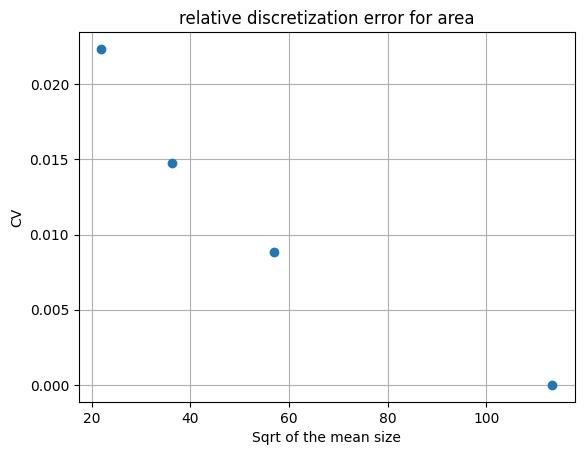

array([[1.13349019e+02, 0.00000000e+00],
       [5.69868406e+01, 8.87625102e-03],
       [3.63885284e+01, 1.47674968e-02],
       [2.19772610e+01, 2.23564141e-02]])

In [28]:

def compute_cv_and_mean(file_names):
    results = []

    for file_name in file_names:
        sizes = compute_size(file_name)
        if len(sizes) > 0:
            mean_size = np.mean(sizes)
            # print(mean_size)
            std_dev = np.std(sizes)
            cv = std_dev / mean_size
            
            results.append((np.sqrt(mean_size), cv))
    
    return np.array(results)

def plot_cv_vs_mean(results, title):
    plt.figure()
    plt.plot(results[:, 0], results[:, 1], 'o')
    plt.xlabel('Sqrt of the mean size')
    plt.ylabel('CV')
    plt.title(f'relative discretization error for {title}')
    plt.grid(True)
    plt.show()

results = compute_cv_and_mean(file_names)
plot_cv_vs_mean(results, title="area")
results

## 2.2.5

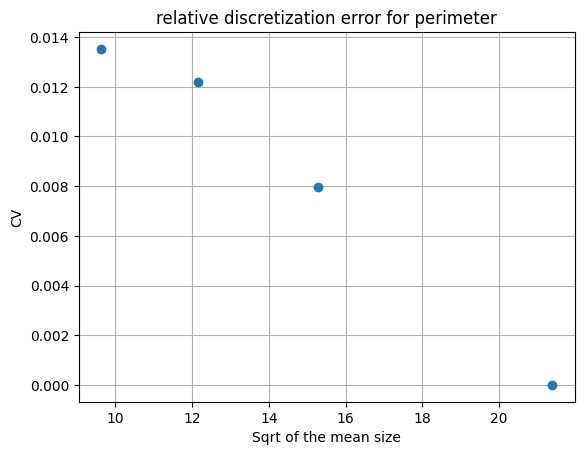

In [29]:
def compute_cv_and_mean_perimeter(file_names):
    results = []

    for file_name in file_names:
        perimeters = compute_perimeter(file_name)
        if len(perimeters) > 0:
            mean_perimeter = np.mean(perimeters)
            std_dev = np.std(perimeters)
            cv = std_dev / mean_perimeter

            results.append((np.sqrt(mean_perimeter), cv))

    return np.array(results)

results_perimeter = compute_cv_and_mean_perimeter(file_names)
plot_cv_vs_mean(results_perimeter, title="perimeter")

Differences:
RDE is an indication of how accurate the measure is, compared to its actual size. If a rectangle is smaller, its more difficult to be very accurate.
So as perimeter is only the outside of the object, a single inaccuracy can have a bigger impact than the entire size. This is why the RDE gets lower more slowly than for size.

## 2.3.7

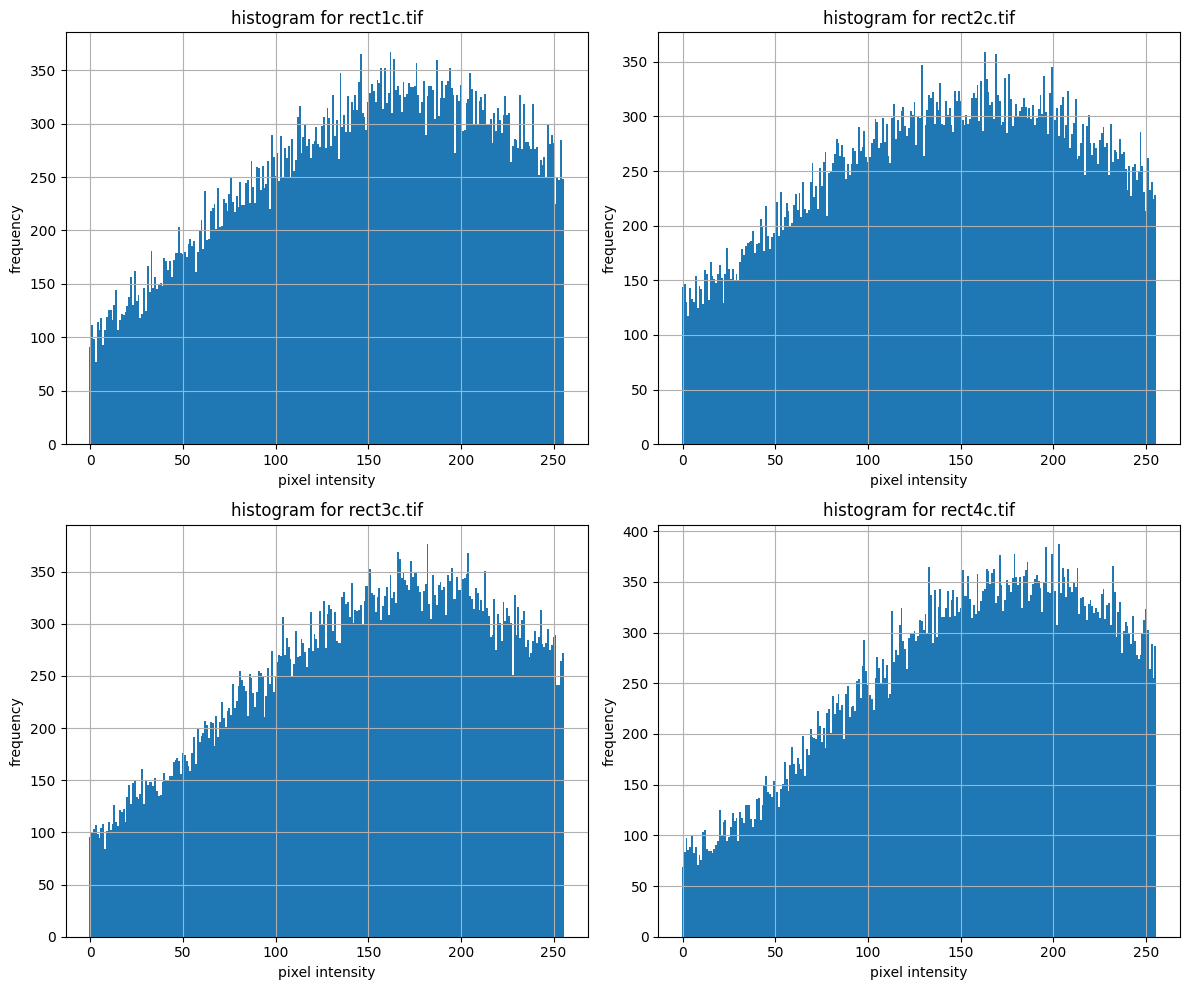

In [30]:
file_names_b = ["rect1b.tif", "rect2b.tif", "rect3b.tif", "rect4b.tif"]
file_names_c = ["rect1c.tif", "rect2c.tif", "rect3c.tif", "rect4c.tif"]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs = axs.flatten()

for idx, file_name in enumerate(file_names_c):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    
    hist = dip.Histogram(A)
    
    bin_counts = hist.GetImage()
    
    bin_centers = hist.BinCenters()
    
    axs[idx].bar(bin_centers, bin_counts, width=1.0, align='center')
    axs[idx].set_title(f"histogram for {file_name}")
    axs[idx].set_xlabel('pixel intensity')
    axs[idx].set_ylabel('frequency')
    axs[idx].grid(True)

fig.tight_layout()
plt.show()

# for i in file_names_b:
#     plot_histogram(i)
# for i in file_names_c:
#     plot_histogram(i)

## 2.3.8 & 2.3.9

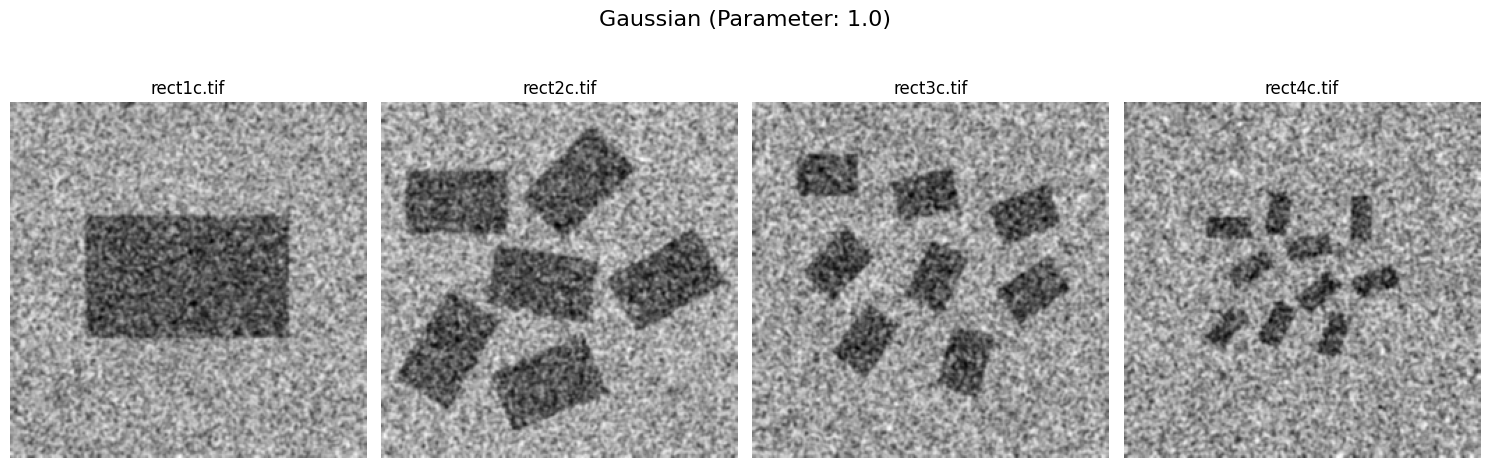

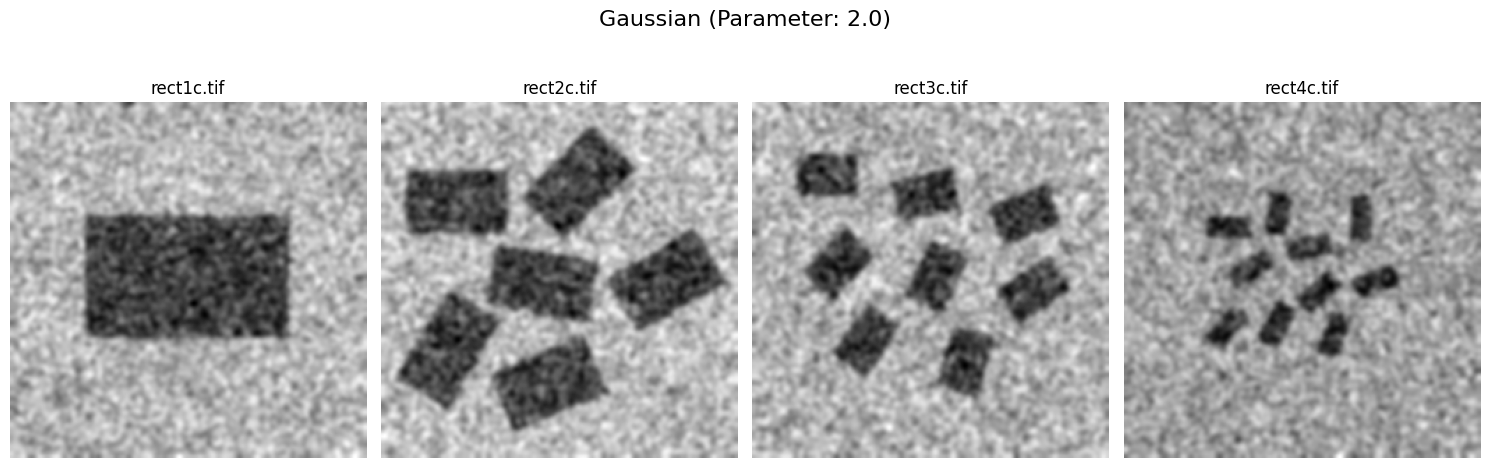

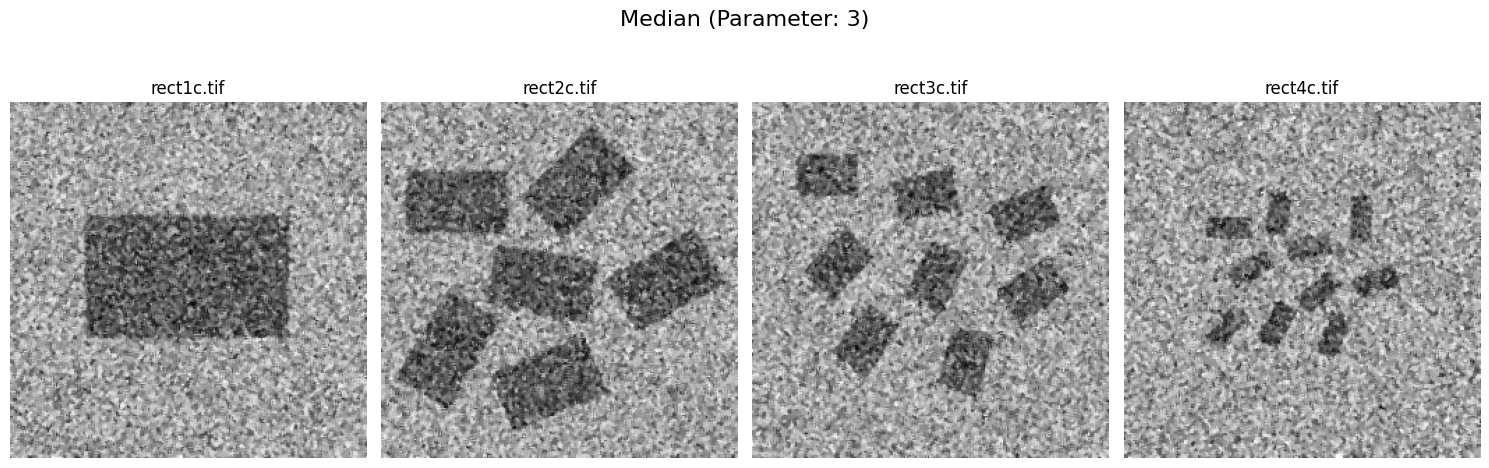

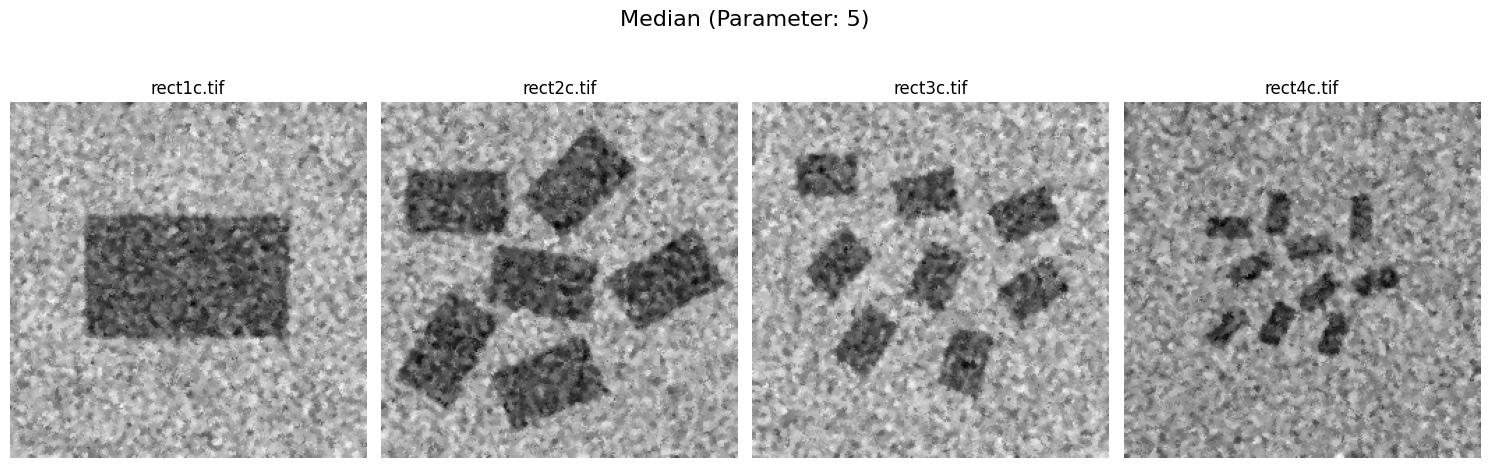

In [36]:
# plot the result image nicely for report

def apply_gaussian_filter(image, sigma):
    return dip.Gauss(image, sigma)

def apply_median_filter(image, kernel_size):
    return dip.MedianFilter(image, [kernel_size, kernel_size])

def plot_filtered_images(file_names, filter_name, filtered_images, param):
    n_images = len(file_names)
    fig, axs = plt.subplots(1, n_images, figsize=(15, 5))
    fig.suptitle(f"{filter_name} (Parameter: {param})", fontsize=16)

    for idx, (ax, img, fname) in enumerate(zip(axs, filtered_images, file_names)):
        ax.imshow(img, cmap='gray')
        ax.set_title(f"{fname}")
        ax.axis('off')

    fig.tight_layout()
    fig.subplots_adjust(top=0.85)  # Add space for the main title
    plt.show()

def analyze_series_with_filters(file_names, filter_functions):
    for filter_name, (filter_func, params) in filter_functions.items():
        for param in params:
            filtered_images = []
            for file_name in file_names:
                A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
                filtered_image = filter_func(A, param)
                filtered_images.append(filtered_image)

            plot_filtered_images(file_names, filter_name, filtered_images, param)


filters = {
    "Gaussian": (apply_gaussian_filter, [1.0, 2.0]),
    "Median": (apply_median_filter, [3, 5])
}

analyze_series_with_filters(file_names_c, filters)

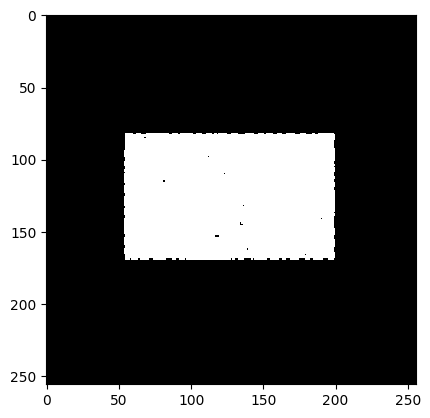

Filter:  Gaussian  with paramater:  1.0  file:  rect1b.tif


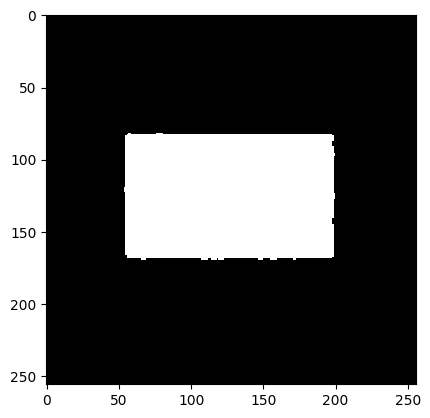

Filter:  Gaussian  with paramater:  2.0  file:  rect1b.tif


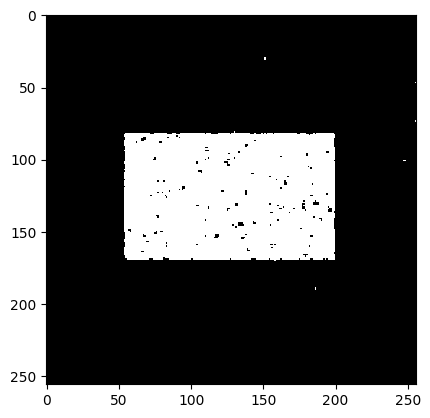

Filter:  Median  with paramater:  3  file:  rect1b.tif


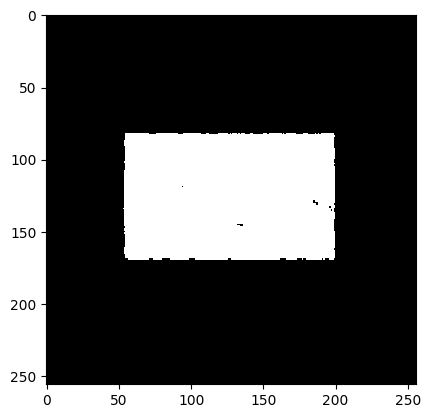

Filter:  Median  with paramater:  5  file:  rect1b.tif


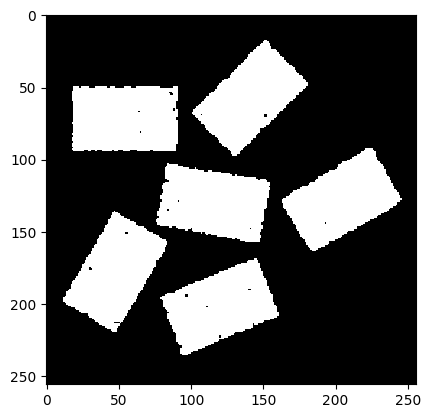

Filter:  Gaussian  with paramater:  1.0  file:  rect2b.tif


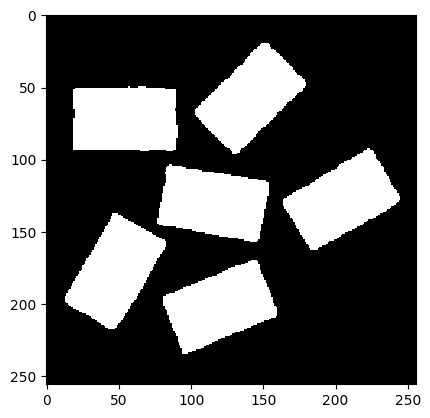

Filter:  Gaussian  with paramater:  2.0  file:  rect2b.tif


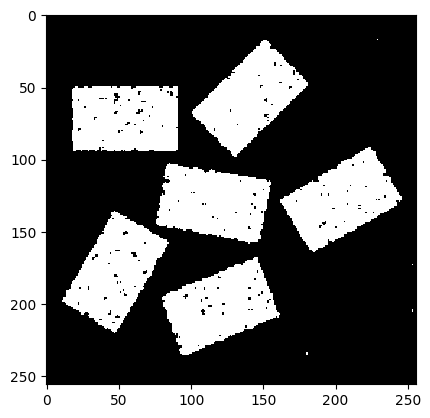

Filter:  Median  with paramater:  3  file:  rect2b.tif


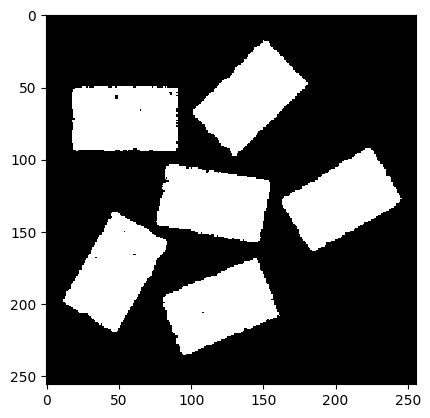

Filter:  Median  with paramater:  5  file:  rect2b.tif


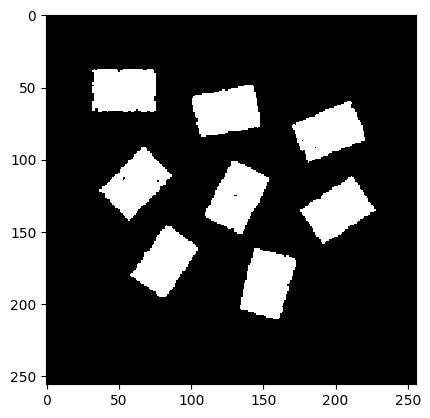

Filter:  Gaussian  with paramater:  1.0  file:  rect3b.tif


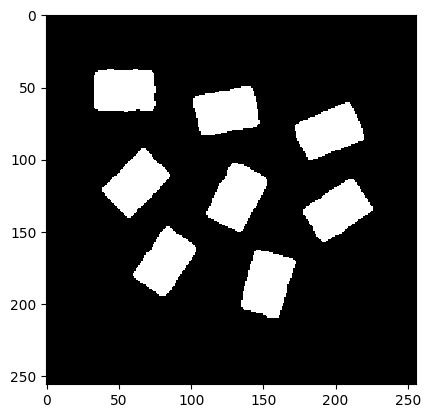

Filter:  Gaussian  with paramater:  2.0  file:  rect3b.tif


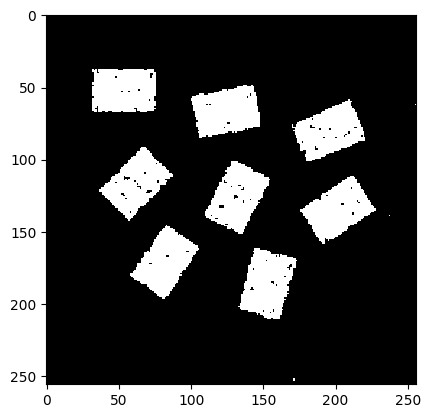

Filter:  Median  with paramater:  3  file:  rect3b.tif


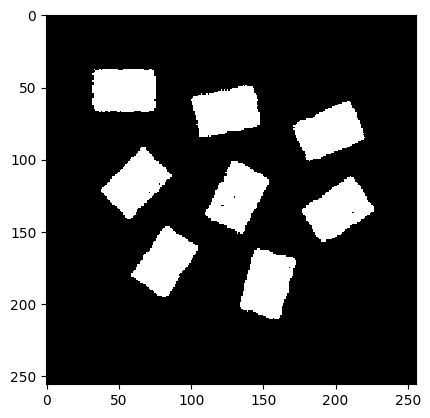

Filter:  Median  with paramater:  5  file:  rect3b.tif


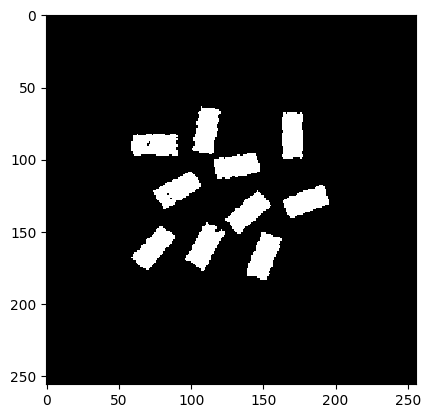

Filter:  Gaussian  with paramater:  1.0  file:  rect4b.tif


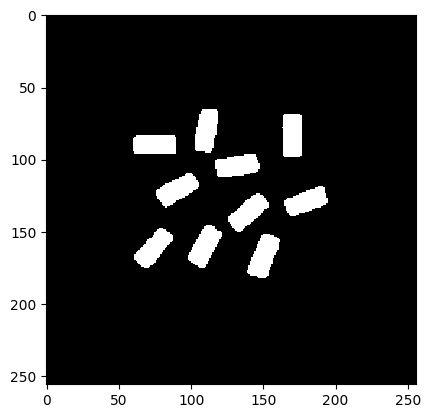

Filter:  Gaussian  with paramater:  2.0  file:  rect4b.tif


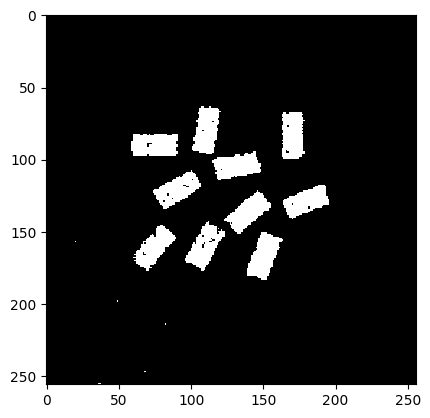

Filter:  Median  with paramater:  3  file:  rect4b.tif


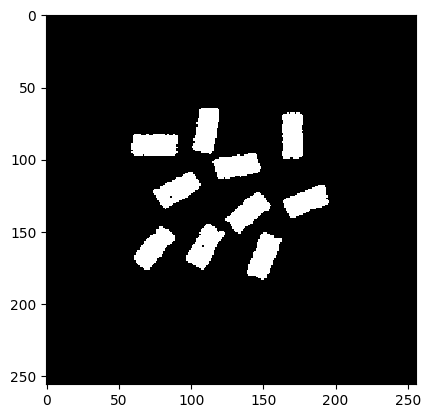

Filter:  Median  with paramater:  5  file:  rect4b.tif


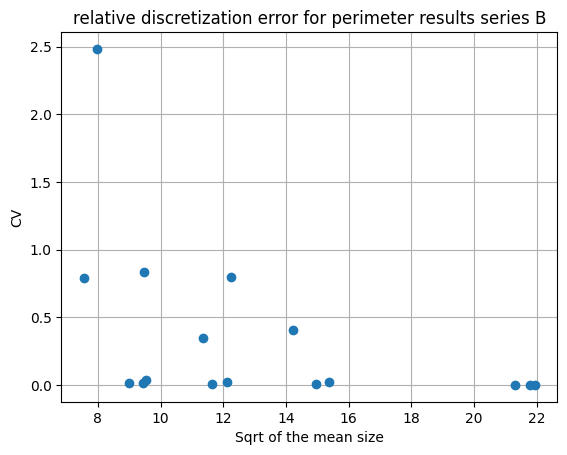

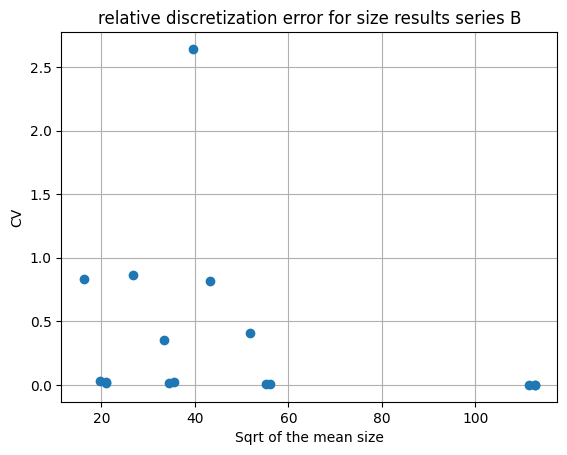

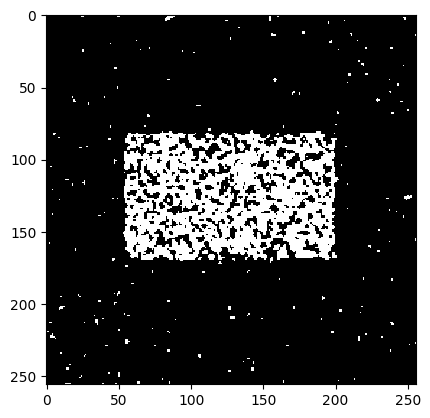

Filter:  Gaussian  with paramater:  1.0  file:  rect1c.tif


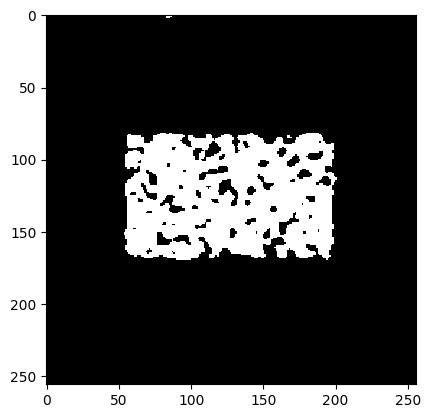

Filter:  Gaussian  with paramater:  2.0  file:  rect1c.tif


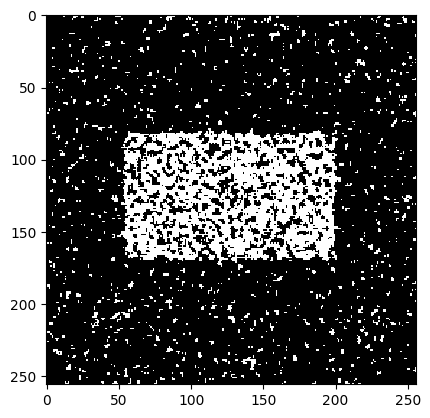

Filter:  Median  with paramater:  3  file:  rect1c.tif


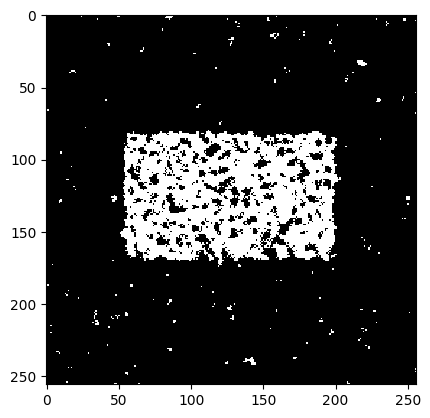

Filter:  Median  with paramater:  5  file:  rect1c.tif


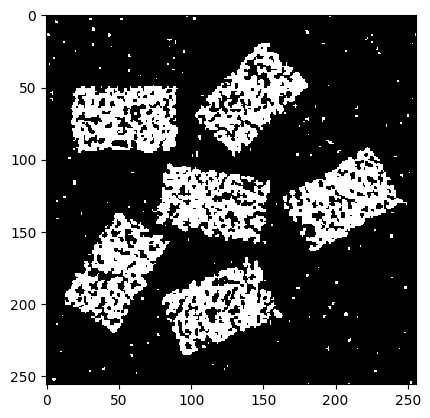

Filter:  Gaussian  with paramater:  1.0  file:  rect2c.tif


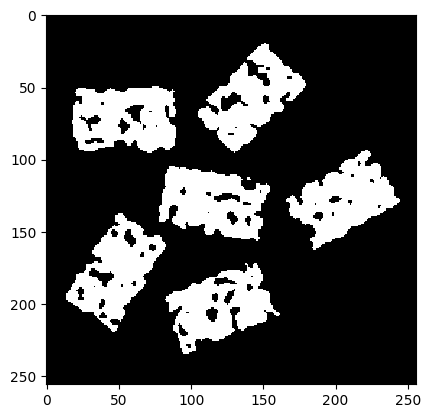

Filter:  Gaussian  with paramater:  2.0  file:  rect2c.tif


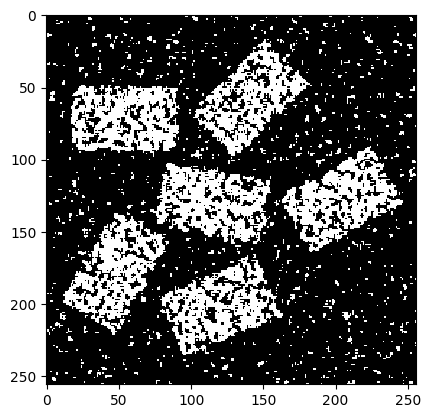

Filter:  Median  with paramater:  3  file:  rect2c.tif


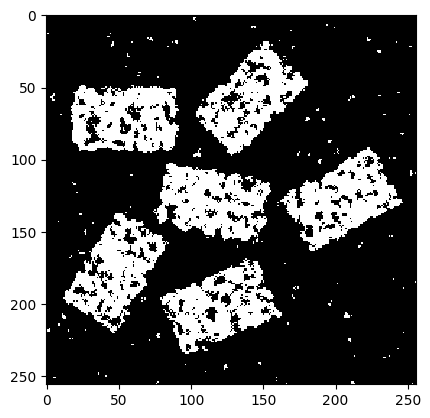

Filter:  Median  with paramater:  5  file:  rect2c.tif


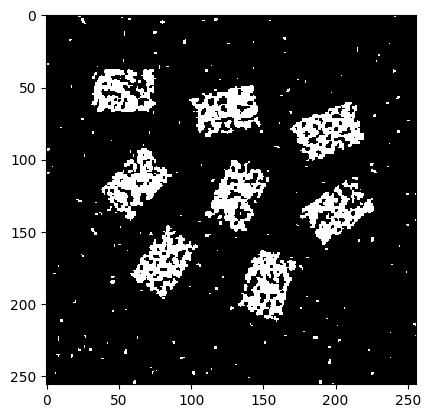

Filter:  Gaussian  with paramater:  1.0  file:  rect3c.tif


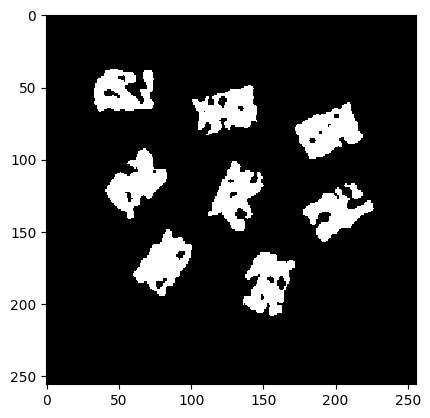

Filter:  Gaussian  with paramater:  2.0  file:  rect3c.tif


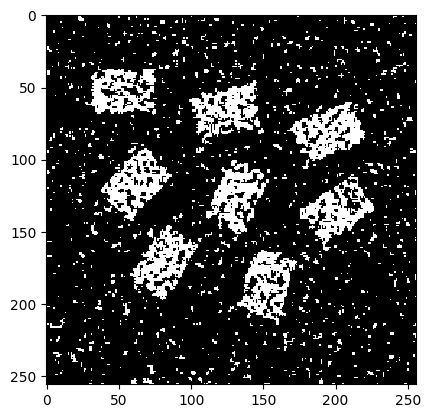

Filter:  Median  with paramater:  3  file:  rect3c.tif


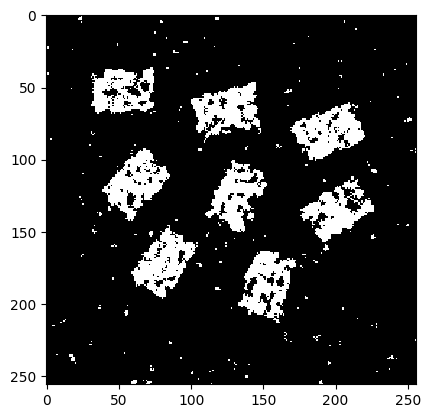

Filter:  Median  with paramater:  5  file:  rect3c.tif


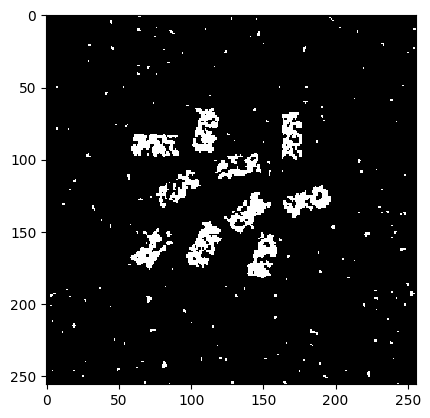

Filter:  Gaussian  with paramater:  1.0  file:  rect4c.tif


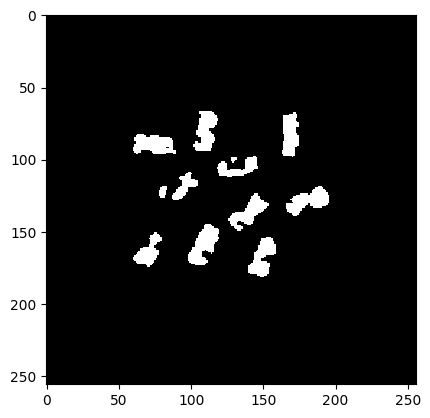

Filter:  Gaussian  with paramater:  2.0  file:  rect4c.tif


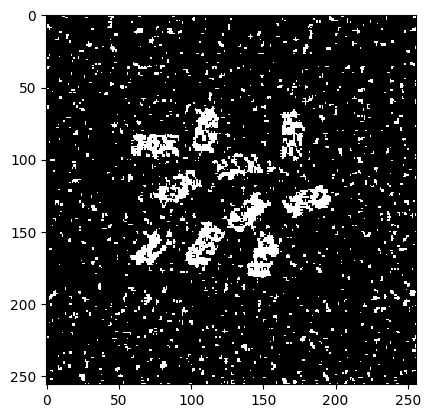

Filter:  Median  with paramater:  3  file:  rect4c.tif


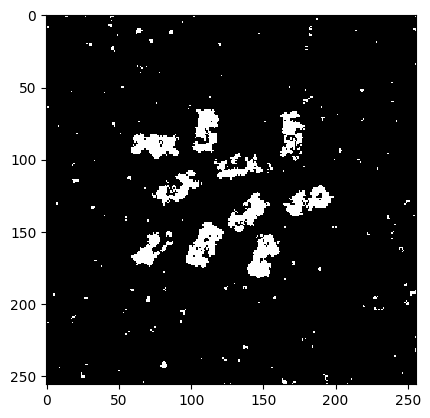

Filter:  Median  with paramater:  5  file:  rect4c.tif


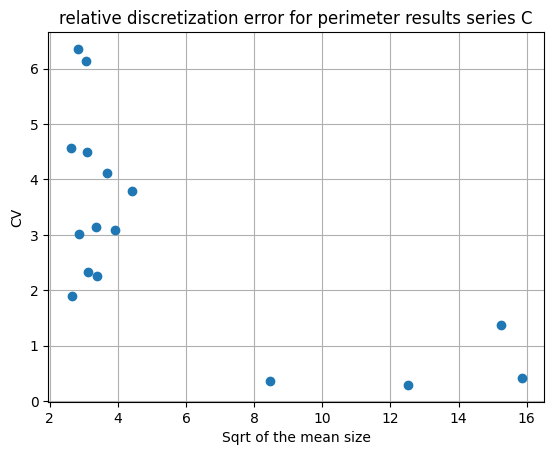

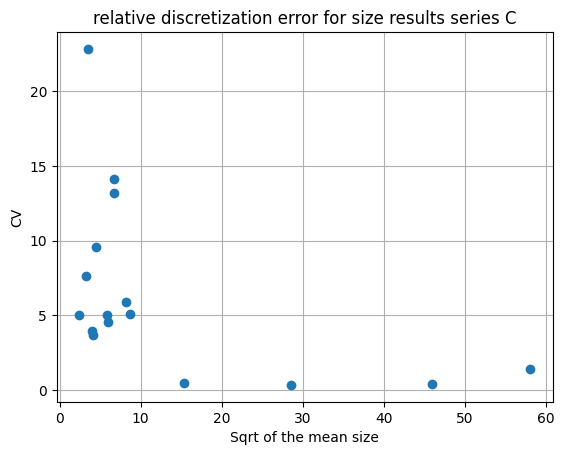

In [55]:
# original function, use for RDE

def apply_gaussian_filter(image, sigma):
    return dip.Gauss(image, sigma)

def apply_median_filter(image, kernel_size):
    return dip.MedianFilter(image, [kernel_size, kernel_size])

def compute_size(binary_image):
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Size'])
    sizes = np.array([measurements['Size'][obj] for obj in measurements.Objects()])
    return sizes
    

def compute_perimeter(binary_image):
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Perimeter'])
    sizes = np.array([measurements['Perimeter'][obj] for obj in measurements.Objects()])
    return sizes

def analyze_series_with_filters(file_names, filter_functions, filter_params):
    results_p = []
    results_s = []

    for file_name in file_names:
        A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))

        for filter_name, (filter_func, params) in filter_functions.items():
            for param in params:
                filtered_image = filter_func(A, param)
                threshold = dip.IsodataThreshold(filtered_image)
                binary_image = filtered_image < 110
                binary_image.Show()
                print("Filter: ", filter_name, " with paramater: ",  param, " file: ", file_name)
                # filtered_image.Show()
                # hist = dip.Histogram(filtered_image)
                # hist.Show()
                perimeter = compute_perimeter(binary_image)
                size = compute_size(binary_image)
                # print(perimeter)
                # print(size)

                if len(perimeter) > 0:
                    mean_perimeter = np.mean(perimeter)
                    std_dev = np.std(perimeter)
                    cv = std_dev / mean_perimeter

                    results_p.append((np.sqrt(mean_perimeter), cv))

                if len(size) > 0:
                    mean_size = np.mean(size)
                    std_dev = np.std(size)
                    cv = std_dev / mean_size

                    results_s.append((np.sqrt(mean_size), cv))


    return np.array(results_s),np.array(results_p)

filters = {
    "Gaussian": (apply_gaussian_filter, [1.0, 2.0]),
    "Median": (apply_median_filter, [3, 5])
}

b_results_s, b_results_p = analyze_series_with_filters(file_names_b, filters, None)
plot_cv_vs_mean(b_results_p, title="perimeter results series B")
plot_cv_vs_mean(b_results_s, title="size results series B")

c_results_s, c_results_p = analyze_series_with_filters(file_names_c, filters, None)
plot_cv_vs_mean(c_results_p, title="perimeter results series C")
plot_cv_vs_mean(c_results_s, title="size results series C")



## 2.4

In [33]:
def compute_snr(image):
    mean_intensity = np.mean(image)
    std_dev_intensity = np.std(image)
    return mean_intensity / std_dev_intensity

def analyze_series_snr(file_names, filter_functions, filter_params):
    results_before = {}
    results_after = {}

    for file_name in file_names:
        A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
        snr_before = compute_snr(A)
        results_before[file_name] = snr_before

        for filter_name, (filter_func, params) in filter_functions.items():
            for param in params:
                filtered_image = filter_func(A, param)
                snr_after = compute_snr(filtered_image)
                results_after[f"{file_name}_{filter_name}_{param}"] = snr_after

    return results_before, results_after

def print_snr(results_before, results_after):
    print("SNR before filter:")
    for file, snr in results_before.items():
        print(f"{file}: {snr:.2f}")

    print("\nSNR after filter:")
    for filter_config, snr in results_after.items():
        print(f"{filter_config}: {snr:.2f}")

filters = {
    "Gaussian": (apply_gaussian_filter, [1.0, 2.0]),
    "Median": (apply_median_filter, [3, 5])
}


series_a_files = ["rect1a.tif", "rect2a.tif", "rect3a.tif", "rect4a.tif"]
series_b_files = ["rect1b.tif", "rect2b.tif", "rect3b.tif", "rect4b.tif"]
series_c_files = ["rect1c.tif", "rect2c.tif", "rect3c.tif", "rect4c.tif"]

results_a_before, results_a_after = analyze_series_snr(series_a_files, filters, None)
results_b_before, results_b_after = analyze_series_snr(series_b_files, filters, None)
results_c_before, results_c_after = analyze_series_snr(series_c_files, filters, None)

print("Series A results")
print_snr(results_a_before, results_a_after)

print("\nSeries B results")
print_snr(results_b_before, results_b_after)

print("\nSeries C results")
print_snr(results_c_before, results_c_after)


Series A results
SNR before filter:
rect1a.tif: 3.28
rect2a.tif: 2.63
rect3a.tif: 3.64
rect4a.tif: 5.46

SNR after filter:
rect1a.tif_Gaussian_1.0: 3.33
rect1a.tif_Gaussian_2.0: 3.37
rect1a.tif_Median_3: 3.29
rect1a.tif_Median_5: 3.29
rect2a.tif_Gaussian_1.0: 2.71
rect2a.tif_Gaussian_2.0: 2.79
rect2a.tif_Median_3: 2.63
rect2a.tif_Median_5: 2.63
rect3a.tif_Gaussian_1.0: 3.78
rect3a.tif_Gaussian_2.0: 3.93
rect3a.tif_Median_3: 3.64
rect3a.tif_Median_5: 3.65
rect4a.tif_Gaussian_1.0: 5.80
rect4a.tif_Gaussian_2.0: 6.19
rect4a.tif_Median_3: 5.48
rect4a.tif_Median_5: 5.50

Series B results
SNR before filter:
rect1b.tif: 2.66
rect2b.tif: 2.30
rect3b.tif: 2.83
rect4b.tif: 3.43

SNR after filter:
rect1b.tif_Gaussian_1.0: 3.63
rect1b.tif_Gaussian_2.0: 3.78
rect1b.tif_Median_3: 3.32
rect1b.tif_Median_5: 3.46
rect2b.tif_Gaussian_1.0: 3.02
rect2b.tif_Gaussian_2.0: 3.18
rect2b.tif_Median_3: 2.76
rect2b.tif_Median_5: 2.88
rect3b.tif_Gaussian_1.0: 4.09
rect3b.tif_Gaussian_2.0: 4.40
rect3b.tif_Median_3: 

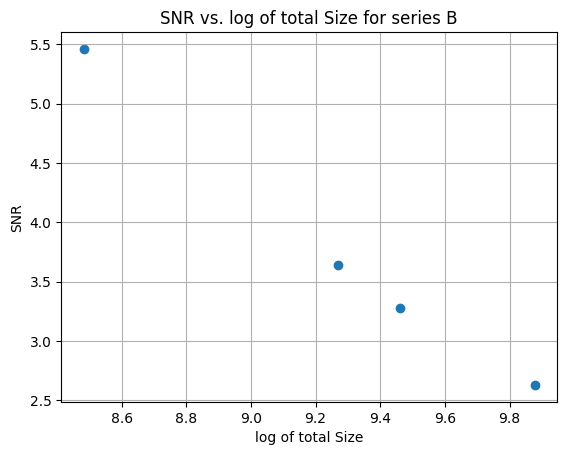

In [40]:
def compute_sum_of_measurements(binary_image, measurement_type):
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, [measurement_type])
    return np.sum([measurements[measurement_type][obj] for obj in measurements.Objects()])

def plot_snr_vs_log_measurement(file_names, snr_dict, measurement_type):
    sums = []
    snrs = []

    for file_name in file_names:
        A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
        binary_image = A < 70  # change for different series
        measurement_sum = compute_sum_of_measurements(binary_image, measurement_type)
        snr_value = snr_dict[file_name]
        
        sums.append(np.log(measurement_sum))  
        snrs.append(snr_value)

    plt.figure()
    plt.scatter(sums, snrs, marker='o')
    plt.xlabel(f'log of total {measurement_type}')
    plt.ylabel('SNR')
    plt.title(f'SNR vs. log of total {measurement_type} for series B')
    plt.grid(True)
    plt.show()

# snr values
# {"rect1a.tif": 3.28, "rect2a.tif": 2.63, "rect3a.tif": 3.64, "rect4a.tif": 5.46}
# {"rect1b.tif": 2.66, "rect2b.tif": 2.30, "rect3b.tif": 2.83, "rect4b.tif": 3.43}
# {"rect1c.tif": 2.16, "rect2c.tif": 2.04, "rect3c.tif": 2.20, "rect4c.tif":2.33}


plot_snr_vs_log_measurement(
    file_names=series_a_files,
    snr_dict={"rect1a.tif": 3.28, "rect2a.tif": 2.63, "rect3a.tif": 3.64, "rect4a.tif": 5.46}, 
    measurement_type='Size'
)

Text(0, 0.5, 'SNR')

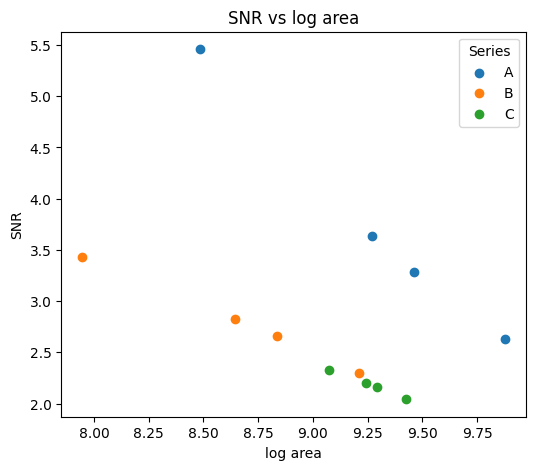

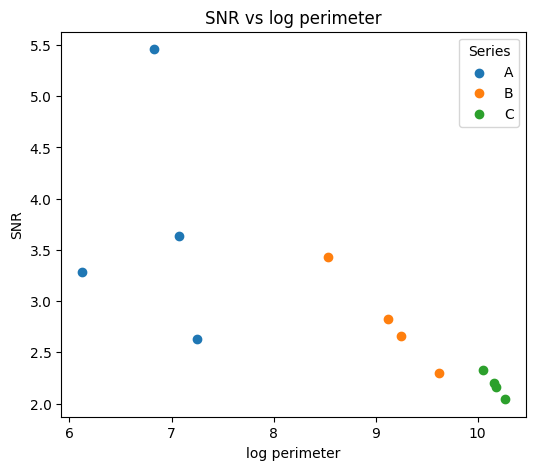

In [5]:
def measure(img, mtype='Size'):
    binary_image = img < 70
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, img, [mtype])
    sizes = np.array([measurements[mtype][obj] for obj in measurements.Objects()])
    return sizes

root = 'IAAM_Images'
images = {'A': {}, 'B': {}, 'C': {}}

for filename in os.listdir(root):
    series = filename[-5].upper()
    number = int(filename[-6])
    images[series][number] = dip.ImageReadTIFF(os.path.join(root, filename))

fig1, ax1 = plt.subplots(1, 1, figsize=(6, 5), sharey=True)
fig2, ax2 = plt.subplots(1, 1, figsize=(6, 5), sharey=True)
for series in images.keys():
    areas = []
    perimeters = []
    snrs = []
    for num in images[series].keys():
        areas.append(measure(images[series][num], 'Size').sum())
        perimeters.append(measure(images[series][num], 'Perimeter').sum())
        mu = np.mean(images[series][num])
        sigma = np.std(images[series][num])
        snrs.append(mu / sigma)
    ax1.scatter(np.log(areas), snrs, label=series)
    ax2.scatter(np.log(perimeters), snrs, label=series)

ax1.legend(title='Series')
ax1.set_title('SNR vs log area')
ax1.set_xlabel('log area')
ax1.set_ylabel('SNR')
# fig1.savefig('figures/2.4.13 area.png')

ax2.legend(title='Series')
ax2.set_title('SNR vs log perimeter')
ax2.set_xlabel('log perimeter')
ax2.set_ylabel('SNR')
# fig2.savefig('figures/2.4.13 perimeter.png')